In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mat4py as mt
import os
from IPython.display import Image
from IPython.core.display import HTML 

In [33]:
%cd A:\python\EEG
%ls

A:\python\EEG
 Volume in drive A is Ali
 Volume Serial Number is 9466-8A5E

 Directory of A:\python\EEG

08/06/2019  06:20 PM    <DIR>          .
08/06/2019  06:20 PM    <DIR>          ..
08/07/2019  03:48 AM    <DIR>          Data
08/07/2019  03:46 AM               393 EEG.py
               1 File(s)            393 bytes
               3 Dir(s)  369,663,324,160 bytes free


In [34]:
N_channel = 19
N_subj = 132

In [35]:
disorder_dic = []
directory = os.fsencode('Data\Disorder')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    disorder_dic.append(np.array(mt.loadmat('Data\Disorder\{}'.format(filename))[filename.split('.')[0]]))
    
channels_disorder = [ [] for i in range(len(disorder_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_disorder:
    for i in range(19):
        person.append(disorder_dic[j][:,i])

        
normal_dic = []
directory = os.fsencode('Data\\Normal')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    normal_dic.append(np.array(mt.loadmat('Data\\Normal\{}'.format(filename))[filename.split('.')[0]]))
    
channels_normal = [ [] for i in range(len(normal_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_normal:
    for i in range(19):
        person.append(normal_dic[j][:,i])
        
        
data = {"N":channels_normal,
      "D":channels_disorder}

Now the syntax of our data is like the following:

Data[Type][person][channel]

Type --->   "N" for Normal
            "

(-4, 256.0)

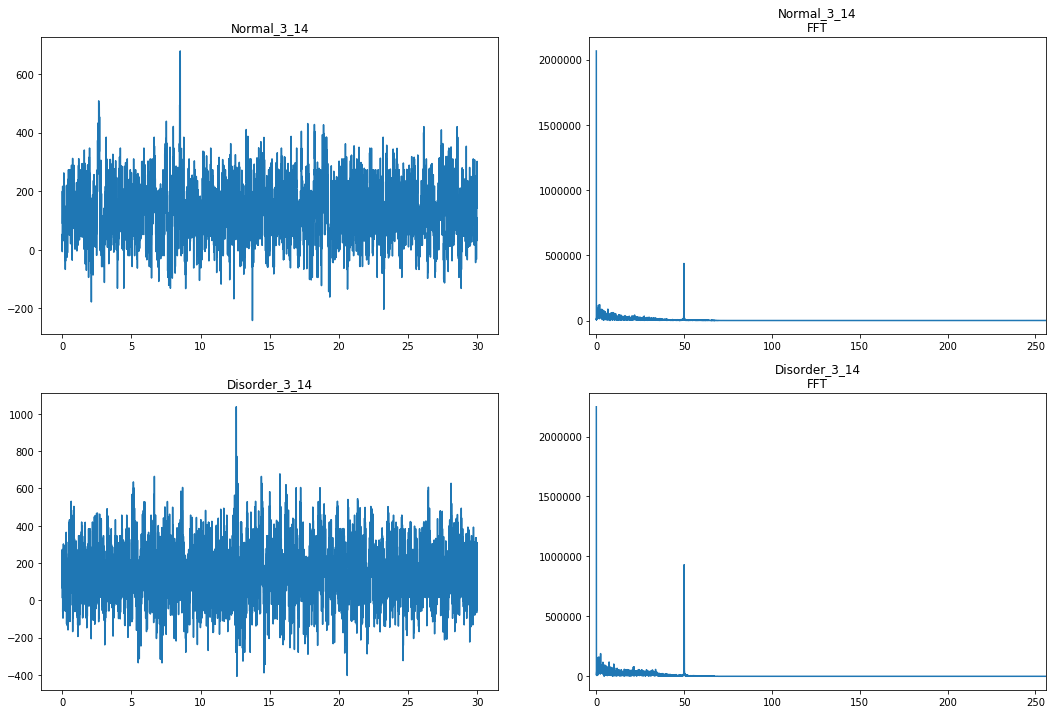

In [36]:
t = np.linspace(0,30,512*30)
f = np.linspace(0,512,512*30)
fig = plt.figure( 'Example Plot', figsize=(18,12))
ax = fig.add_subplot(2,2,1, title = 'Normal_3_14')
ax.plot(t,data["N"][3][14])
ax = fig.add_subplot(2,2,2, title = 'Normal_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data["N"][3][14])))
ax.set_xlim([-4,512/2])
ax = fig.add_subplot(2,2,3, title = 'Disorder_3_14')
ax.plot(t,data["D"][3][14])
ax = fig.add_subplot(2,2,4, title = 'Disorder_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data['D'][3][14])))
ax.set_xlim([-4,512/2])


As we can see in the above plots, the both disorder and normal cases has a pick on 50 hz.
But the intensity of the pick of the disorder subject is higher.

# Averaging

The different persons with same channels can attribute to a better nois cancelation by averaging

In [37]:
def Average(data, type_ , chan, t, f) :  # All the data dictionary, the Type, the channel that you want the average of, the time domain, the frequency domain
    chan = 12
    N_subh = len(data[type_])
    chann_avg = np.zeros(512*30)
    for i in range (N_subj):
        chann_avg += data[type_][i][chan]
    chann_av = chann_avg/N_subj
    fig = plt.figure('Averaged signal over persons', figsize = (30,15))
    ax = fig.add_subplot(2,1,1,title='Time Domain')
    ax.plot(t,chann_av)  
    ax = fig.add_subplot(2,1,2, title = 'Frequency domain')
    ax.plot(f,np.abs(np.fft.fft(chann_avg))) 
    ax.set_xlim((-5,512/2))


## N Average

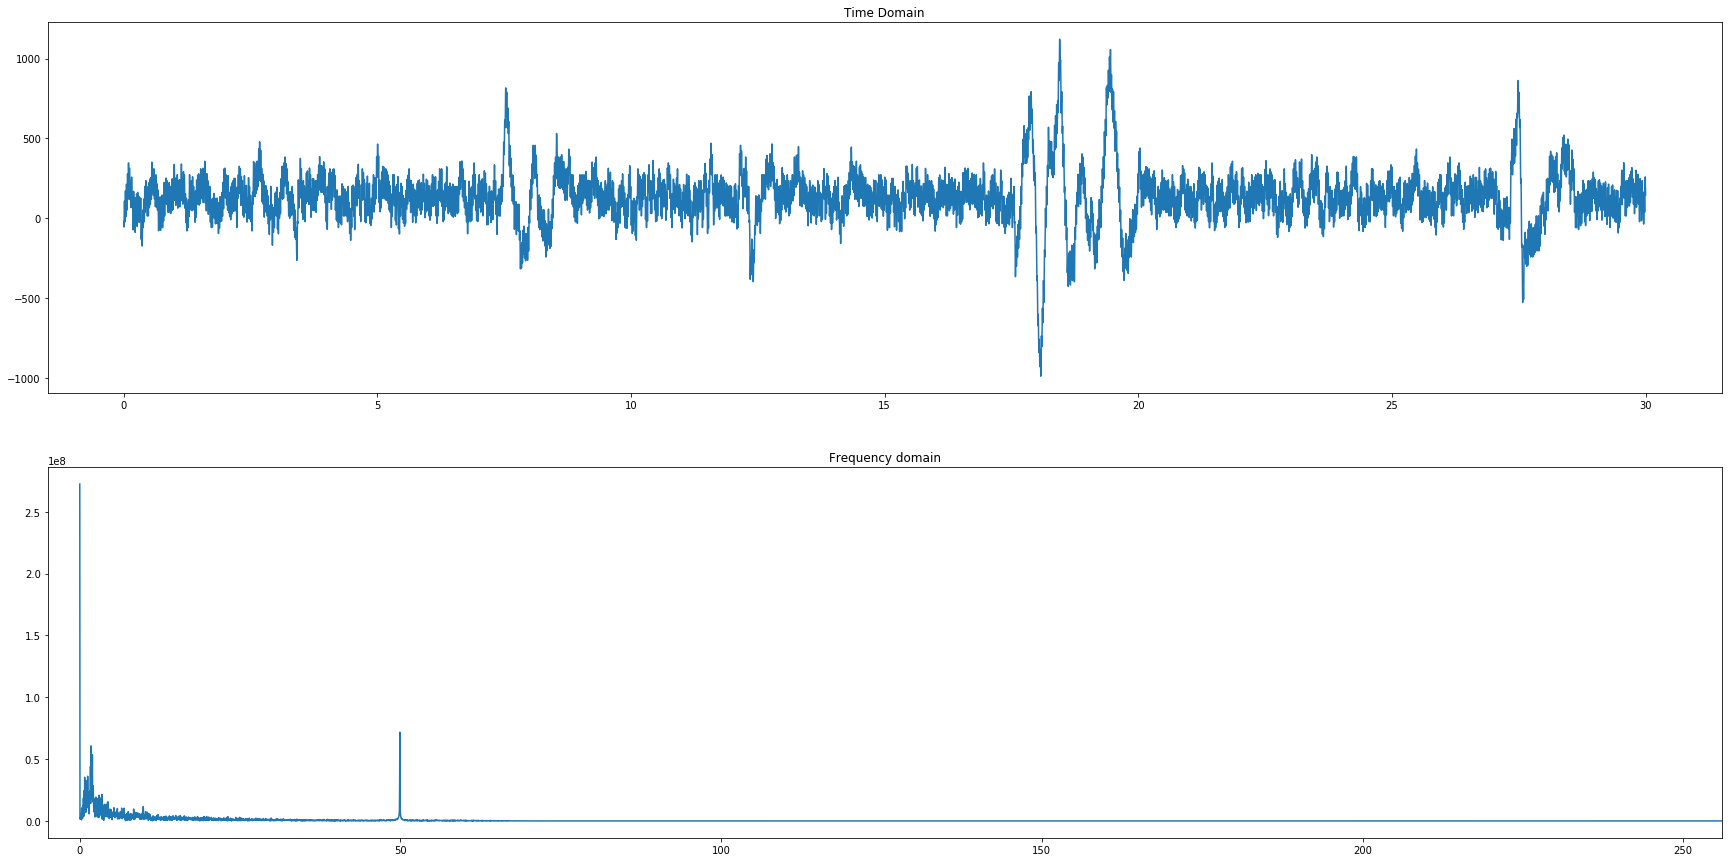

In [38]:
Average(data,'N',12,t,f)

## D Average

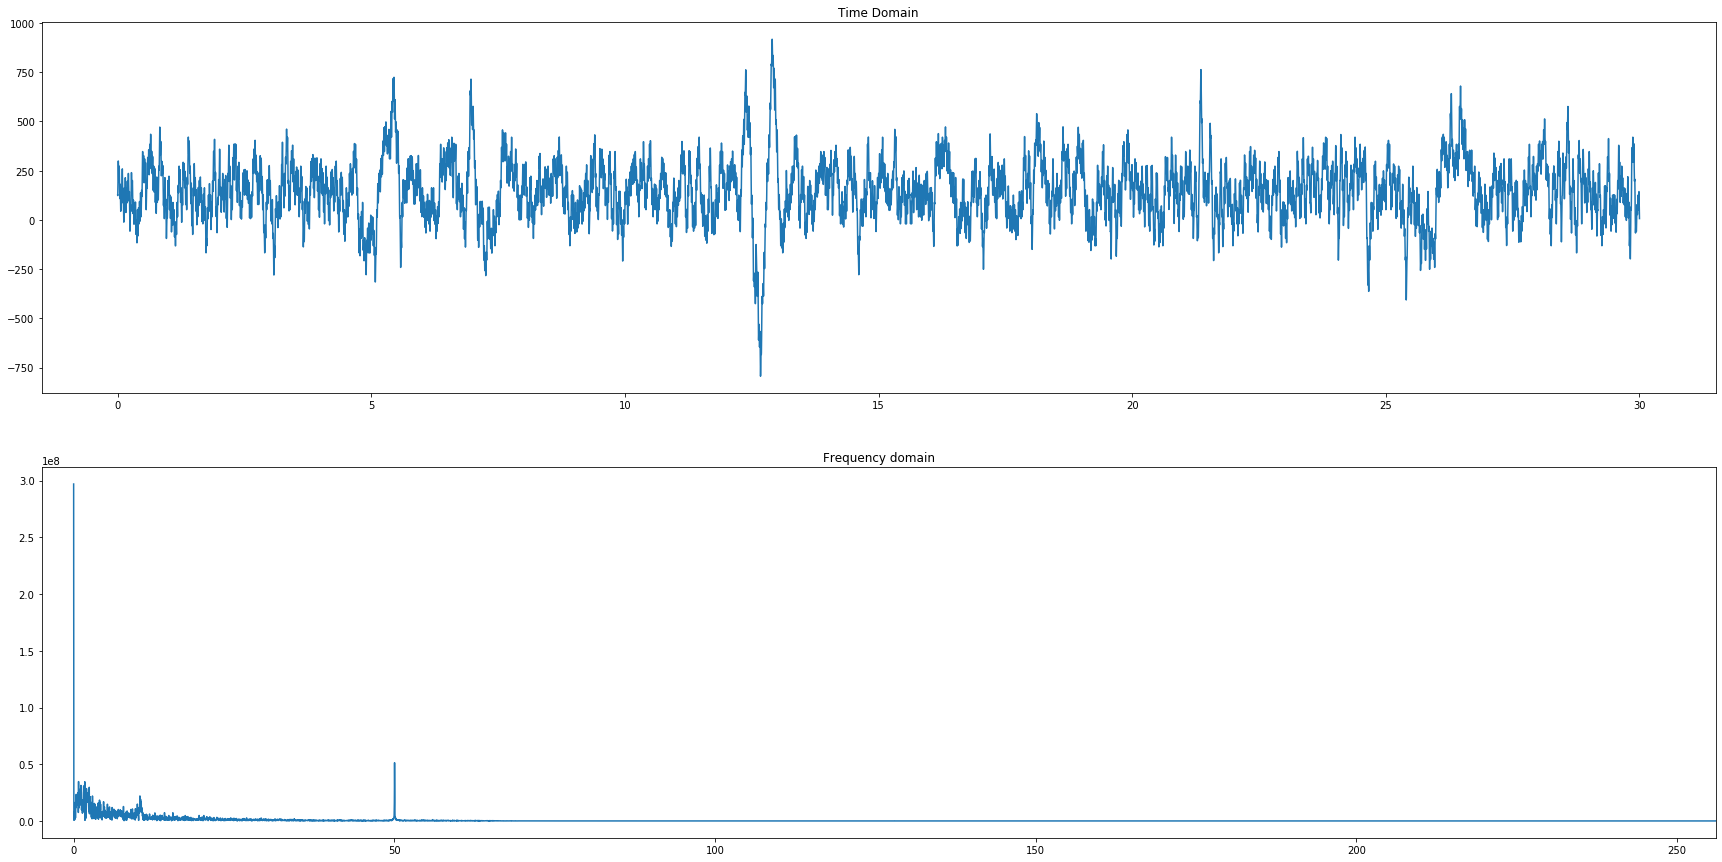

In [39]:
Average(data,'D',12,t,f)

# My Idea

![alt text](https://www.researchgate.net/profile/Maureen_Clerc/publication/280046005/figure/fig3/AS:281234811965445@1444063012715/Extended-10-20-EEG-system-Electrodes-are-identified-with-labels-the-letters-correspond.png)

![alt text](https://raw.githubusercontent.com/alifele/Pic-for-Py/master/EEG%20Map.png)




One way that we can consider our problem is the following:
in the above picture you can see the mapping of the electrodes on huuman head. we can consider it as a 2D picture and we can use the CNN. In this case our data is not the brightness of an specific pixel, but instead each pixel in fact is a 512*30 array. So our data can be the specific properties of that node. For example the pick of the FT, Or 